Data Analysis

1. The mean tumour size over time was reduced only by Capomulin; Infubinol and Ketapril's results were in line with the placebo, showing no reduction.
2. Caplomulin performed well with metastatic spread as well, with the lowest lowest mean number of sites over the 40 days. Infubinol was next in line of effectiveness, while Ketapril roughly ranged with the placebo once again. 
3. The survival rate of Capolmulin over the entire study was much higher than the other options- ~85% versus all under 50%. The clear winner was Capolmulin.

In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_csv = os.path.join("data","mouse_drug_data.csv")
clinical_trial_csv = os.path.join("data","clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_drug_csv)
df_clinical_trial = pd.read_csv(clinical_trial_csv)

# Combine the data into a single dataset
df_merged = pd.merge(df_clinical_trial,df_mouse, on="Mouse ID", how="inner")

# Display the data table for preview
df_tumours = df_merged.sort_values(["Timepoint","Metastatic Sites"])
df_tumours.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
10,f932,0,45.0,0,Ketapril
11,g107,0,45.0,0,Ketapril
19,a457,0,45.0,0,Ketapril
22,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumours_groupby = df_tumours.groupby(["Drug","Timepoint"])
tumours_mean_values = tumours_groupby["Tumor Volume (mm3)"].mean()
tumours_mean_values
tumours_groupby["Timepoint"].head()
# Convert to DataFrame
df_treatment_mean = pd.DataFrame({"Tumor Volume Mean (mm3)":tumours_mean_values})
df_treatment_mean.reset_index(level=0, inplace=True)
df_treatment_mean.reset_index(level=0, inplace=True)
# Preview DataFrame
df_treatment_mean.head()


,Timepoint,Drug,Tumor Volume Mean (mm3)
0,0,Capomulin,45.000000
1,5,Capomulin,44.266086
2,10,Capomulin,43.084291
3,15,Capomulin,42.064317
4,20,Capomulin,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

se_tumours = tumours_groupby["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
df_se_treatment = pd.DataFrame({"Tumor Volume Standard Error (mm3)":se_tumours})
df_se_treatment.reset_index(level=0, inplace=True)
df_se_treatment.reset_index(level=0, inplace=True)

# Preview DataFrame
df_se_treatment


,Timepoint,Drug,Tumor Volume Standard Error (mm3)
0,0,Capomulin,0.000000
1,5,Capomulin,0.448593
2,10,Capomulin,0.702684
3,15,Capomulin,0.838617
4,20,Capomulin,0.909731
...,...,...,...
95,25,Zoniferol,0.602513
96,30,Zoniferol,0.800043
97,35,Zoniferol,0.881426
98,40,Zoniferol,0.998515


In [6]:
# Minor Data Munging to Re-Format the Data Frames
df_reformat = df_treatment_mean.pivot(index = "Timepoint", columns = "Drug",values="Tumor Volume Mean (mm3)")
# Preview that Reformatting worked
df_reformat.head()






Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [7]:
#Find the Indexes
df_se_treatment.Drug.unique()

# Indexes
# Capomulin = 0
# Infubinol = 2
# Ketapril = 3
# Placebo = 5

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [8]:
# Tumour mean data
Capomulin_data = df_reformat.iloc[:,0]
Infubinol_data = df_reformat.iloc[:,2]
Ketapril_data = df_reformat.iloc[:,3]
Placebo_data = df_reformat.iloc[:,5]

# Y error values
y_error_Capomulin = df_se_treatment.loc[df_se_treatment["Drug"]=="Capomulin","Tumor Volume Standard Error (mm3)"]
y_error_Infubinol = df_se_treatment.loc[df_se_treatment["Drug"]=="Infubinol","Tumor Volume Standard Error (mm3)"]
y_error_Ketapril = df_se_treatment.loc[df_se_treatment["Drug"]=="Ketapril","Tumor Volume Standard Error (mm3)"]
y_error_Placebo = df_se_treatment.loc[df_se_treatment["Drug"]=="Placebo","Tumor Volume Standard Error (mm3)"]


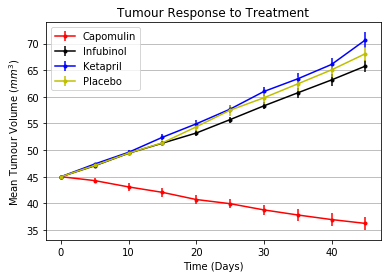

In [9]:
# Generate the Plot (with Error Bars)
fig1, ax1 = plt.subplots()
x_val = [i*5 for i in range(10)]

# Showing and configuring the figure
ax1.errorbar(x_val,Capomulin_data, yerr=y_error_Capomulin, marker='.', color="r", label="Capomulin")
ax1.errorbar(x_val,Infubinol_data, yerr=y_error_Infubinol, marker='.', color="k", label="Infubinol")
ax1.errorbar(x_val,Ketapril_data, yerr=y_error_Ketapril, marker='.', color="b", label="Ketapril")
ax1.errorbar(x_val,Placebo_data, yerr=y_error_Placebo, marker='.', color="y", label="Placebo")

ax1.set_title("Tumour Response to Treatment")
ax1.set_xlabel("Time (Days)")
ax1.set_ylabel("Mean Tumour Volume ($mm^3$)")
ax1.grid(axis = 'y')
ax1.legend()

# Save the Figure
fig1.savefig("Fig 1.png")


## Metastatic Response to Treatment

In [40]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_groupby = df_tumours.groupby(["Drug","Timepoint"])
metastatic_mean = metastatic_groupby["Metastatic Sites"].mean()
metastatic_mean.head()
# Convert to DataFrame 
## msm = metastatic sites mean
df_msm = pd.DataFrame({"Metastatic Sites Mean":metastatic_mean})
df_msm.reset_index(level=0, inplace=True)
df_msm.reset_index(level=0, inplace=True)
# Preview DataFrame
df_msm.head()



,Timepoint,Drug,Metastatic Sites Mean
0,0,Capomulin,0.000000
1,5,Capomulin,0.160000
2,10,Capomulin,0.320000
3,15,Capomulin,0.375000
4,20,Capomulin,0.652174


In [42]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
            
# Metastatic Site Standard Error = msse
msse = metastatic_groupby["Metastatic Sites"].sem()

# Convert to DataFrame
df_msse = pd.DataFrame({"Metastatic Sites Standard Error":msse})
df_msse.reset_index(level= 0, inplace = True)
df_msse.reset_index(level= 0, inplace = True)

# Preview DataFrame
df_msse.head()

,Timepoint,Drug,Metastatic Sites Standard Error
0,0,Capomulin,0.000000
1,5,Capomulin,0.074833
2,10,Capomulin,0.125433
3,15,Capomulin,0.132048
4,20,Capomulin,0.161621


In [43]:
# Minor Data Munging to Re-Format the Data Frames
msm_reformat = df_msm.pivot(index = "Timepoint", columns = "Drug")
# Preview that Reformatting worked
msm_reformat

Metastatic Sites Mean                                          \
Drug                  Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                                 
0                      0.000000  0.000000  0.000000  0.000000  0.000000   
5                      0.160000  0.380952  0.280000  0.304348  0.260870   
10                     0.320000  0.600000  0.666667  0.590909  0.523810   
15                     0.375000  0.789474  0.904762  0.842105  0.857143   
20                     0.652174  1.111111  1.050000  1.210526  1.150000   
25                     0.818182  1.500000  1.277778  1.631579  1.500000   
30                     1.090909  1.937500  1.588235  2.055556  2.066667   
35                     1.181818  2.071429  1.666667  2.294118  2.266667   
40                     1.380952  2.357143  2.100000  2.733333  2.466667   
45                     1.476190  2.692308  2.111111  3.363636  2.538462   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.375000  0.320000  0.120000  0.240000  0.166667  
10         0.833333  0.565217  0.250000  0.478261  0.500000  
15         1.250000  0.764706  0.333333  0.782609  0.809524  
20         1.526316  1.000000  0.347826  0.952381  1.294118  
25         1.941176  1.357143  0.652174  1.157895  1.687500  
30         2.266667  1.615385  0.782609  1.388889  1.933333  
35         2.642857  2.300000  0.952381  1.562500  2.285714  
40         3.166667  2.777778  1.100000  1.583333  2.785714  
45         3.272727  2.571429  1.250000  1.727273  3.071429

In [44]:
# Generate the Plot (with Error Bars)

#Find the Indexes
df_msm.Drug.unique()

# Indexes
# Capomulin = 0
# Infubinol = 2
# Ketapril = 3
# Placebo = 5

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [45]:
# designation
Capomulin_data = msm_reformat.iloc[:,0]
Infubinol_data = msm_reformat.iloc[:,2]
Ketapril_data = msm_reformat.iloc[:,3]
Placebo_data = msm_reformat.iloc[:,5]


In [47]:
# y error values per drug
y_error_Capomulin = df_msse.loc[df_msse["Drug"]=="Capomulin","Metastatic Sites Standard Error"]
y_error_Infubinol = df_msse.loc[df_msse["Drug"]=="Infubinol","Metastatic Sites Standard Error"]
y_error_Ketapril = df_msse.loc[df_msse["Drug"]=="Ketapril","Metastatic Sites Standard Error"]
y_error_Placebo = df_msse.loc[df_msse["Drug"]=="Placebo","Metastatic Sites Standard Error"]


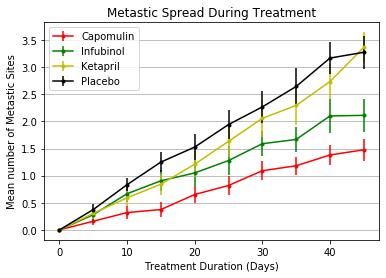

In [64]:
# Generate the Plot (with Error Bars)
fig2, ax2 = plt.subplots()
x_val = [i*5 for i in range(10)]

# Showing and configuring the figure
ax2.errorbar(x_val,Capomulin_data, yerr=y_error_Capomulin, marker= ".", color="r", label="Capomulin")
ax2.errorbar(x_val,Infubinol_data, yerr=y_error_Infubinol, marker= ".", color="g", label="Infubinol")
ax2.errorbar(x_val,Ketapril_data, yerr=y_error_Ketapril, marker= ".", color="y", label="Ketapril")
ax2.errorbar(x_val,Placebo_data, yerr=y_error_Placebo, marker=".", color="k", label="Placebo")

ax2.set_title("Metastic Spread During Treatment")
ax2.set_xlabel("Treatment Duration (Days)")
ax2.set_ylabel("Mean number of Metastic Sites")
ax2.grid(axis = 'y')
ax2.legend();

# Save the Figure
fig2.savefig("Fig 2.png")





![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [65]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df_mice= df_tumours[["Timepoint","Drug","Mouse ID"]]
# mice_df
mice_groupby = df_mice.groupby(["Timepoint","Drug"])
mice_count = mice_groupby["Mouse ID"].count()

# Convert to DataFrame
df_mice_survival = pd.DataFrame({"Mouse Count":mice_count})
df_mice_survival.reset_index(level=0, inplace=True)
df_mice_survival.reset_index(level=0, inplace=True)
df_mice_survival.sort_values(by=["Drug","Timepoint"])
# Preview DataFrame
df_mice_survival.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Ceftamin,0,25
2,Infubinol,0,25
3,Ketapril,0,25
4,Naftisol,0,25


In [66]:
# Minor Data Munging to Re-Format the Data Frames
mice_survival_reformat = df_mice_survival.pivot(index = "Timepoint", columns = "Drug")
# Preview the Data Frame
mice_survival_reformat.head()



Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [68]:
#Percentages
def drug_percentages(drug):
    if drug == "Capomulin":
        return (mice_survival_reformat.iloc[:,0]/mice_survival_reformat.iloc[0,0])*100
    elif drug == "Infubinol":
        return (mice_survival_reformat.iloc[:,2]/mice_survival_reformat.iloc[0,2])*100
    elif drug == "Ketapril":
        return (mice_survival_reformat.iloc[:,3]/mice_survival_reformat.iloc[0,3])*100
    elif drug == "Placebo":
        return (mice_survival_reformat.iloc[:,5]/mice_survival_reformat.iloc[0,5])*100
    else:
        return "Please enter the following drugs only: Capomulin, Infubinol, Ketapril, Placebo"

# Drugs:
Capomulin_Percent = drug_percentages("Capomulin")
Infubinol_Percent = drug_percentages("Infubinol")
Ketapril_Percent = drug_percentages("Ketapril")
Placebo_Percent = drug_percentages("Placebo")
    
    


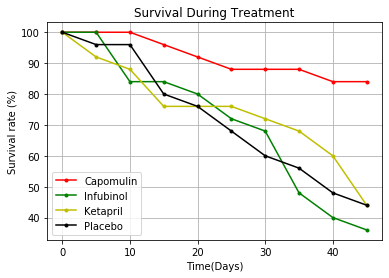

In [69]:
# Generate the Plot (Accounting for percentages)
fig3, ax3 = plt.subplots()
x_val = [i*5 for i in range(10)]

ax3.plot(x_val,Capomulin_Percent,marker='.',color="r",label="Capomulin")
ax3.plot(x_val,Infubinol_Percent,marker='.',color="g",label="Infubinol")
ax3.plot(x_val,Ketapril_Percent,marker='.',color="y",label="Ketapril")
ax3.plot(x_val,Placebo_Percent,marker='.',color="k",label="Placebo")
ax3.legend()
ax3.grid()
ax3.set_title("Survival During Treatment")
ax3.set_xlabel("Time(Days)")
ax3.set_ylabel("Survival rate (%)");



# Save the Figure
fig3.savefig("Fig 3 - Survival During Treatment")
# Show the Figure
plt.show()

## Summary Bar Graph

In [72]:
# Calculate the percent changes for each drug
#PC = percentage change

drug_mean_tumour = df_reformat.copy()
drug_pc = (drug_mean_tumour.iloc[-1]/(drug_mean_tumour.iloc[0])-1)*100

# Display the data to confirm
print(drug_pc)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


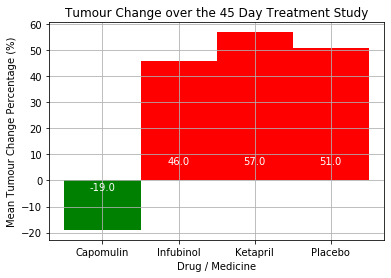

In [80]:
# Store all Relevant Percent Changes into a Tuple
passing_drugs = drug_pc < 0

# Splice the data between passing and failing drugs
drugs_list = ['Capomulin','Infubinol','Ketapril','Placebo']
drugs_list_pc = [round(drug_pc[drug]) for drug in drugs_list]

# Orient widths. Add labels, tick marks, etc. 
fig4, ax4 = plt.subplots()

pass_fail_colors = passing_drugs.map({True: 'g', False: 'r'})
y = [1,2,3,4]
ax4.grid()
ax4.set_title('Tumour Change over the 45 Day Treatment Study');
ax4.set_xlabel('Drug / Medicine');
ax4.set_ylabel('Mean Tumour Change Percentage (%)');
final_chart = ax4.bar(drugs_list, drugs_list_pc,width=-1,color=pass_fail_colors)

# Use functions to label the percentages of changes
def label_maker(rects):
    for rect in rects:
        height = rect.get_height()
        
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        
        ax4.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2.0, label_position),
                    xytext=(0, 9), textcoords="offset points", 
                     ha='center',va='bottom',color='w')

# Call functions to implement the function calls
label_maker(final_chart);

# Save the Figure
fig4.savefig('Fig 4 - Tumour Change over the 45 Day Treatment Study')

# Show the Figure
fig4;

![Metastatic Spread During Treatment](../Images/change.png)